In [ ]:
!pip install rasterio
!pip install geopandas

In [49]:
import rasterio
from rasterio import plot
from rasterio.mask import mask
from rasterio.plot import show
from rasterio.plot import reshape_as_raster, reshape_as_image
import matplotlib.pyplot as plt
import fiona
import shapely
import geopandas as gpd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
import os 
import glob
from skimage.io import imread,imsave
import numpy as np

In [5]:
ras_fp = (r'/content/drive/MyDrive/FCC.tif')
mask_fp = (r'/content/drive/MyDrive/Mask.tif')

In [6]:
gdf = gpd.read_file('/content/drive/MyDrive/GRIDS/Grid128.shp')
# gdf.crs
names = [x for x in gdf['id']]

In [9]:
ras_data = rasterio.open(ras_fp)
mask_data = rasterio.open(mask_fp)

In [11]:
out_raster_fp = '/content/drive/MyDrive/Chips/Images'
out_mask_fp = '/content/drive/MyDrive/Chips/Masks'

In [12]:
for i in range(len(gdf)):
  geom = []
  coord = shapely.geometry.mapping(gdf)["features"][i]["geometry"]
  geom.append(coord)
  # Images
  with rasterio.open(ras_fp)as src:
    out_image, out_transform = rasterio.mask.mask(src,geom,crop=True)
    out_meta = src.meta
  out_meta.update({'driver':'GTiff',
                'height':out_image.shape[1],
                'width':out_image.shape[2],
                'transform':out_transform}) 
  with rasterio.open(f'{out_raster_fp}/{names[i]}.tif','w',**out_meta) as dest:
    dest.write(out_image)
  # Masks
  with rasterio.open(mask_fp)as src:
    out_mask, out_transform = rasterio.mask.mask(src,geom,crop=True)
    out_meta = src.meta
  out_meta.update({'driver':'GTiff',
                'height':out_mask.shape[1],
                'width':out_mask.shape[2],
                'transform':out_transform}) 
  with rasterio.open(f'{out_mask_fp}/{names[i]}.tif','w',**out_meta) as dest:
    dest.write(out_mask)

In [51]:
image_names = glob.glob("/content/drive/MyDrive/Chips/Images/"+"*.tif")
image_names.sort()
images = [imread(image) for image in image_names] 
image_dataset = np.array(images)

In [52]:
mask_names = glob.glob("/content/drive/MyDrive/Chips/Masks/"+"*.tif")
mask_names.sort()
masks = [imread(mask, 0) for mask in mask_names]
mask_dataset = np.array(masks)

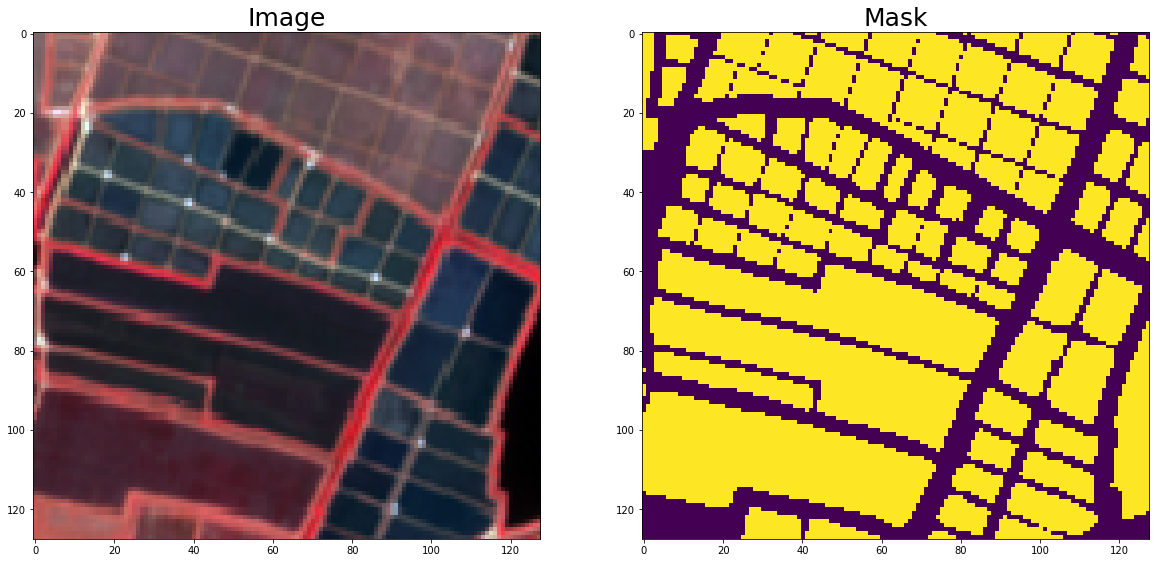

In [90]:
import random
img_number = random.randint(0, len(image_dataset)-1)
img = image_dataset[img_number]
img = scaler.fit_transform(img.reshape(-1, img.shape[-1])).reshape(img.shape)
mask = mask_dataset[img_number]
plt.figure(figsize=(20, 20))
plt.subplot(1,2,1)
plt.title('Image',size = 25)
plt.imshow(img)
plt.subplot(1,2,2)
plt.title('Mask',size = 25)
plt.imshow(mask)
plt.show()

In [36]:
ds=rasterio.open('/content/drive/MyDrive/Chips1/Images/49.0.tif')
image = reshape_as_image(ds.read())
image = scaler.fit_transform(image.reshape(-1, image.shape[-1])).reshape(image.shape)
mask = reshape_as_image(rasterio.open('/content/drive/MyDrive/Chips1/Masks/49.0.tif').read([1]))

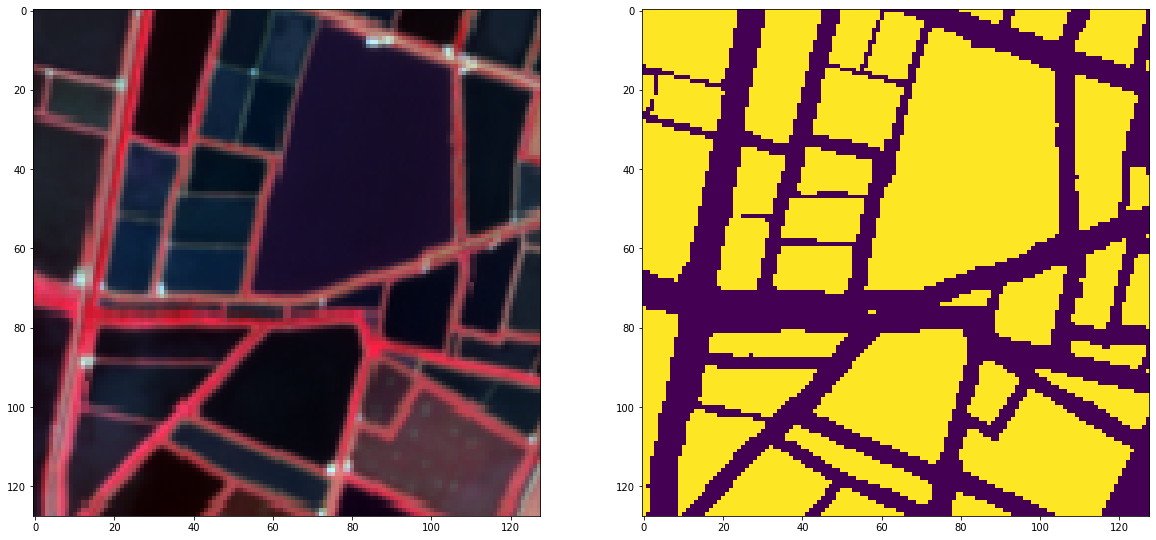

In [44]:
plt.subplots(ncols=2,figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(mask[:,:,0])